# Proyecto final 
## Joaquín Antonio Ramírez Hernández

Ejercicio 3

Aquí se cargan las librerías a utilizar

In [3]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Aquí se leen los datos del archivo 'problema3.csv' y se verifica su contenido, así como la 'calidad' de estos.

In [10]:
df = pd.read_csv('problem3.csv')
df.head()

,x_age,35,18,22,23,28,38,40,25,35.1,34,25.1,20
0,x_cholesterol,220,240,260,220,180,280,235,200,150,280,275,150
1,x_sugar,80,120,55,75,100,74,175,180,240,130,150,125
2,x_Tcell,550,600,580,575,620,674,275,180,140,80,250,325
3,y,0,0,0,0,0,0,1,1,1,1,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
x_age    4 non-null object
35       4 non-null int64
18       4 non-null int64
22       4 non-null int64
23       4 non-null int64
28       4 non-null int64
38       4 non-null int64
40       4 non-null int64
25       4 non-null int64
35.1     4 non-null int64
34       4 non-null int64
25.1     4 non-null int64
20       4 non-null int64
dtypes: int64(12), object(1)
memory usage: 544.0+ bytes


Dado que la edad no está en las filas y se toma ésta como si fueran los features de los datos, se agrega en una 5 fila con la edad de las personas. Esto se hace, ya que la edad podría ser relevante para el progreso del VIH para el ensayo clínico.

In [12]:
df.loc[4]=['x_age', 35,	18,	22,	23,	28,	38,	40,	25,	35.1, 34, 25.1, 20]
df

,x_age,35,18,22,23,28,38,40,25,35.1,34,25.1,20
0,x_cholesterol,220,240,260,220,180,280,235,200,150.0,280,275.0,150
1,x_sugar,80,120,55,75,100,74,175,180,240.0,130,150.0,125
2,x_Tcell,550,600,580,575,620,674,275,180,140.0,80,250.0,325
3,y,0,0,0,0,0,0,1,1,1.0,1,1.0,1
4,x_age,35,18,22,23,28,38,40,25,35.1,34,25.1,20


Aquí se desecha la primera columna y se transladan los datos a un arreglo exclusivamente númerico de (5,12) con el fin de utilizar solo la paquetería numpy.

In [13]:
df1 = df.drop(['x_age'],axis=1)
df1 = df1.to_numpy()
df1.shape

(5, 12)

Aquí se definen los features que dan los datos y se reescalan para poder realizar una regresión logistica.

In [14]:
x_age = df1[4].reshape(-1,1)
x_cholesterol = df1[0].reshape(-1,1)
x_sugar = df1[1].reshape(-1,1)
x_Tcell = df1[2].reshape(-1,1)

In [15]:
model = LogisticRegression(C=0.1, solver='lbfgs', multi_class='ovr')

Primero se realiza la regresión logistica con los datos de la edad. Se observa que el ajuste no es muy bueno por el score obtenido

In [16]:
model.fit(x_age, df1[3])
model.score(x_age, df1[3])

0.5833333333333334

Graficamos para verificar que no hay una función logística ajustada, lo cual, en efecto se observa.

Text(0, 0.5, 'Probabilidad de que la enfermedad progrese')

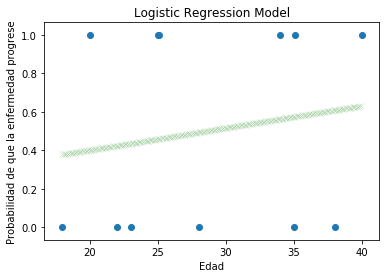

In [17]:
X = np.arange(np.amin(x_age), np.amax(x_age), 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_age, df1[3])
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('Edad')
plt.ylabel('Probabilidad de que la enfermedad progrese')

Graficamos la matriz de confusión y observamos que, los falsos positivos son 2 y los falsos negativos son 3, mientras que los verdaderos positivos son 4 y los verdaderos negativos son 3. Esto nos lleva a concluir que la edad no caracteriza bien el progreso del VIH, sin embargo, para tener un mayor sosten a esta aseveración se va a graficar la curva ROC.

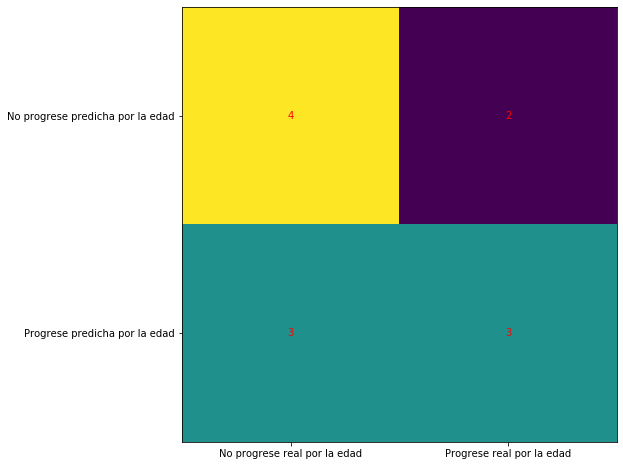

In [19]:
cm = confusion_matrix(df1[3], model.predict(x_age))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('No progrese predicha por la edad', 'Progrese predicha por la edad'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('No progrese real por la edad', 'Progrese real por la edad'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Como se observa por lo anterior y la curva ROC, la edad no es un buen parámetro para determinar el progreso del VIH en una persona.

In [20]:
ns_probs = [0 for _ in range(len(df1[3]))]
lr_probs = model.predict_proba(x_age)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(df1[3], ns_probs)
lr_auc = roc_auc_score(df1[3], lr_probs)
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.611


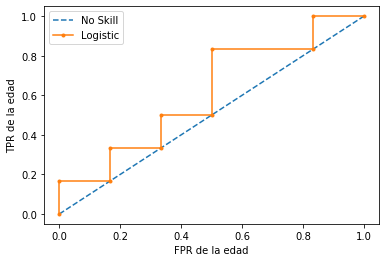

In [324]:
ns_fpr, ns_tpr, _ = roc_curve(df1[3], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(df1[3], lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('FPR de la edad')
plt.ylabel('TPR de la edad')
plt.legend()
plt.show()

Ahora, se hace una regresión logística utilizando el feature del colesterol. En este caso, observamos que no se ajusta muy bien a una sigmoidal por tener un score de 0.5.

In [325]:
model2 = LogisticRegression(C=0.1, solver='lbfgs', multi_class='ovr')
model2.fit(x_cholesterol, df1[3])
model2.score(x_cholesterol, df1[3])

0.5

Graficamos para verificar que no se forme ninguna sigmoidal; vemos que en efecto esto es así.

Text(0, 0.5, 'Probabilidad de que la enfermedad progrese')

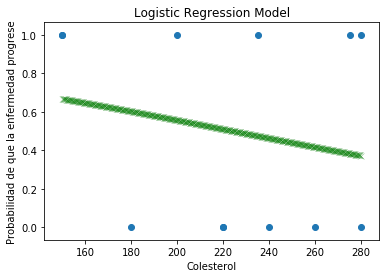

In [326]:
X = np.arange(150, 280, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_cholesterol, df1[3])
plt.scatter(X,model2.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('Colesterol')
plt.ylabel('Probabilidad de que la enfermedad progrese')

Graficamos la matriz de confusión y observamos que, los falsos positivos son 3 y los falsos negativos son 3, mientras que los verdaderos positivos son 3 y los verdaderos negativos son 3. Esto nos lleva a concluir que el colesterol no caracteriza nada bien el progreso del VIH, sin embargo, para tener un mayor sosten a esta aseveración se va a graficar la curva ROC.

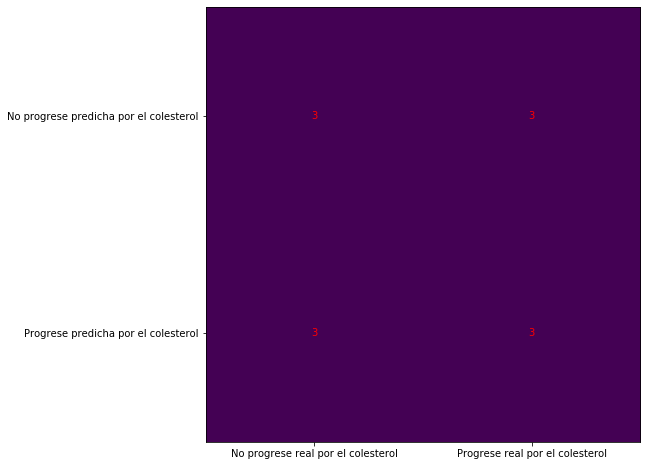

In [327]:
cm2 = confusion_matrix(df1[3], model2.predict(x_cholesterol))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('No progrese predicha por el colesterol', 'Progrese predicha por el colesterol'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('No progrese real por el colesterol', 'Progrese real por el colesterol'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='red')
plt.show()

Observamos que, en efecto, el colesterol no es un buen parámetro para determinar el progreso del VIH en una persona y que inclusive la edad es un mejor parámetro que el colesterol. 

In [328]:
lr_probs = model2.predict_proba(x_cholesterol)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(df1[3], ns_probs)
lr_auc = roc_auc_score(df1[3], lr_probs)
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


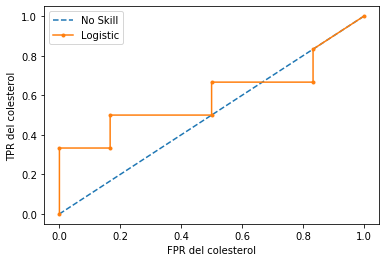

In [329]:
ns_fpr, ns_tpr, _ = roc_curve(df1[3], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(df1[3], lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('FPR del colesterol')
plt.ylabel('TPR del colesterol')
plt.legend()
plt.show()

Ahora, se hace una regresión logística con el feature del azucar. Vemos que este tiene un ajuste perfecto a una función sigmoidal

In [330]:
model3 = LogisticRegression(C=0.1, solver='lbfgs', multi_class='ovr')
model3.fit(x_sugar, df1[3])
model3.score(x_sugar, df1[3])

1.0

Observamos que, en efecto, se forma una función sigmoidal, además, esta separa de manera perfecta los casos en los que la enfermedad avanzó y donde no, de hecho, se puede concluir que a niveles de azucar muy elevados la enfermedad progresa.

Text(0, 0.5, 'Probabilidad de que la enfermedad progrese')

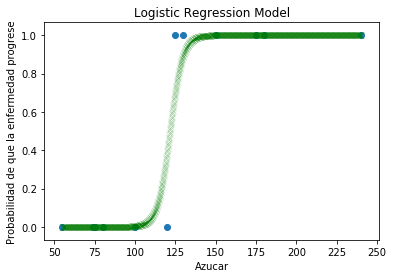

In [331]:
X = np.arange(55, 240, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_sugar, df1[3])
plt.scatter(X,model3.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('Azucar')
plt.ylabel('Probabilidad de que la enfermedad progrese')

Ahora, se grafica la matriz de confusión, se observa que no hay falsos positivos ni falsos negativos, lo cual nos indica que el azucar es un muy buen parámetro para identificar el progreso del VIH.

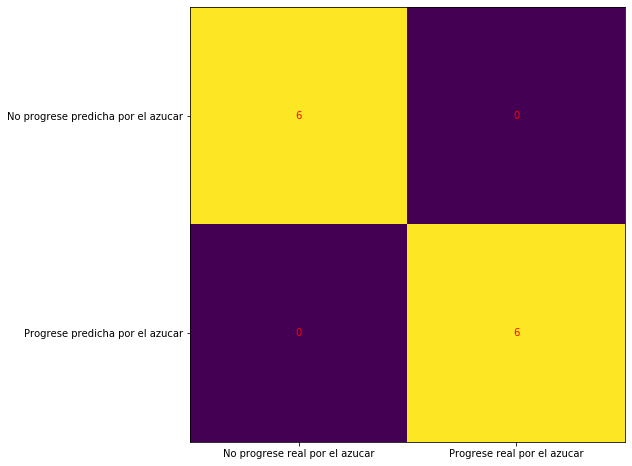

In [332]:
cm3 = confusion_matrix(df1[3], model3.predict(x_sugar))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm3)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('No progrese predicha por el azucar', 'Progrese predicha por el azucar'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('No progrese real por el azucar', 'Progrese real por el azucar'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm3[i, j], ha='center', va='center', color='red')
plt.show()

La aseveración hecha anteriormente tiene mayor peso una vez vista la curva ROC. Por lo tanto, los niveles de azucar en la sangre hacen que progrese o no el VIH.

In [333]:
lr_probs = model3.predict_proba(x_sugar)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(df1[3], ns_probs)
lr_auc = roc_auc_score(df1[3], lr_probs)
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


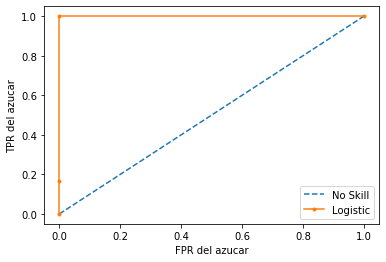

In [334]:
ns_fpr, ns_tpr, _ = roc_curve(df1[3], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(df1[3], lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('FPR del azucar')
plt.ylabel('TPR del azucar')
plt.legend()
plt.show()

Por último, se realiza una regresión logística con el feature niveles de células T. Vemos que tiene un ajuste perfecto.

In [335]:
model4 = LogisticRegression(C=0.1, solver='lbfgs', multi_class='ovr')
model4.fit(x_Tcell, df1[3])
model4.score(x_Tcell, df1[3])

1.0

Observamos que, en efecto, se forma una función sigmoidal, además, esta separa de manera perfecta los casos en los que la enfermedad avanzó y donde no, de hecho, se puede concluir que a niveles de células T elevados la enfermedad no progresa.

Text(0, 0.5, 'Probabilidad de que la enfermedad progrese')

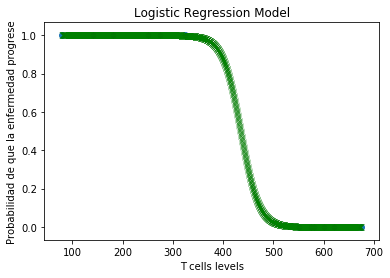

In [336]:
X = np.arange(np.amin(x_Tcell),np.amax(x_Tcell), 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_Tcell, df1[3])
plt.scatter(X,model4.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('T cells levels')
plt.ylabel('Probabilidad de que la enfermedad progrese')

Ahora, se grafica la matriz de confusión, se observa que no hay falsos positivos ni falsos negativos, lo cual nos indica que los niveles de células T son un muy buen parámetro para identificar el progreso del VIH.

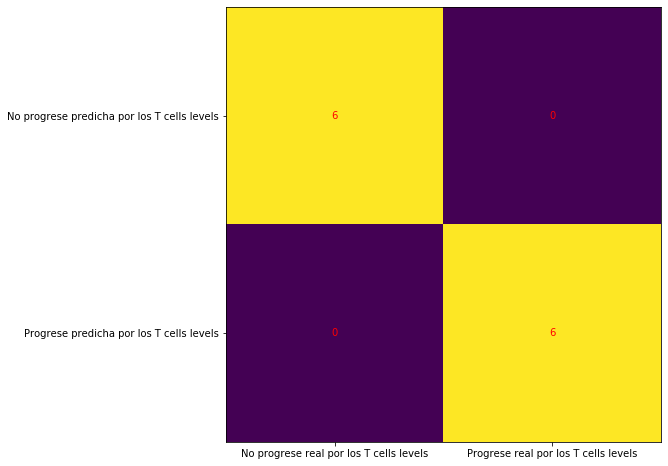

In [337]:
cm4 = confusion_matrix(df1[3], model4.predict(x_Tcell))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm4)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('No progrese predicha por los T cells levels', 'Progrese predicha por los T cells levels'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('No progrese real por los T cells levels', 'Progrese real por los T cells levels'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm4[i, j], ha='center', va='center', color='red')
plt.show()

La aseveración hecha anteriormente tiene mayor peso una vez vista la curva ROC. Por lo tanto, los niveles de celulas T hacen que progrese o no el VIH.

In [338]:
lr_probs = model4.predict_proba(x_Tcell)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(df1[3], ns_probs)
lr_auc = roc_auc_score(df1[3], lr_probs)
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


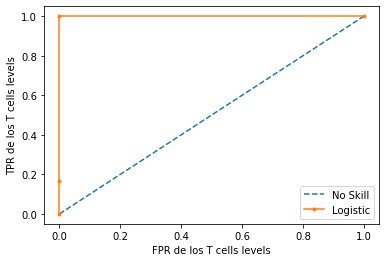

In [339]:
ns_fpr, ns_tpr, _ = roc_curve(df1[3], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(df1[3], lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('FPR de los T cells levels')
plt.ylabel('TPR de los T cells levels')
plt.legend()
plt.show()